## Análisis Descriptivo del Dataset 

### Cargamos el dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


try:

    df = pd.read_csv('avocado.csv')

    print("--- Carga de Datos Exitosa ---")

    print("\n--- 2.1. Primeras filas (df.head()) ---")

    print(df.head())

    
    print("\n--- 2.2. Información del DataFrame (df.info()) ---")
    df.info()

    # Obtenemos estadísticas descriptivas de las variables numéricas
    print("\n--- 2.3. Estadísticas Descriptivas (df.describe()) ---")
    print(df.describe())

except FileNotFoundError:
    print("Error: No se encontró el archivo 'avocado.csv'.")
    print("Por favor, asegúrese de que el archivo esté en el mismo directorio que este script.")



--- Carga de Datos Exitosa ---

--- 2.1. Primeras filas (df.head()) ---
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16     8696.87     8603.62       93.25          0.0  conventional  2015  Albany
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33     9505.56     9408.07       97.49          0.0  conventional  2015  Albany
2           2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50     8145.35     8042.21      103.14          0.0  conventional  2015  Albany
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58     5811.16     5677.40      133.76          0.0  conventional  2015  Albany
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78     6183.95     5986.26      197.69          0.0  c

### Generamos visualizaciones exploratorias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- 1. Carga y Preparación de Datos ---
try:
    df = pd.read_csv('avocado.csv')
    
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Establecemos el tema visual para todos los gráficos
    sns.set_theme(style="whitegrid")
    
    print("DataFrame 'df' cargado y listo.")
    
except FileNotFoundError:
    print("Error: No se encontró el archivo 'avocado.csv'.")
    print("Por favor, asegúrese de que el archivo esté en el mismo directorio.")
except Exception as e:
    print(f"Ha ocurrido un error inesperado: {e}")

DataFrame 'df' cargado y listo.


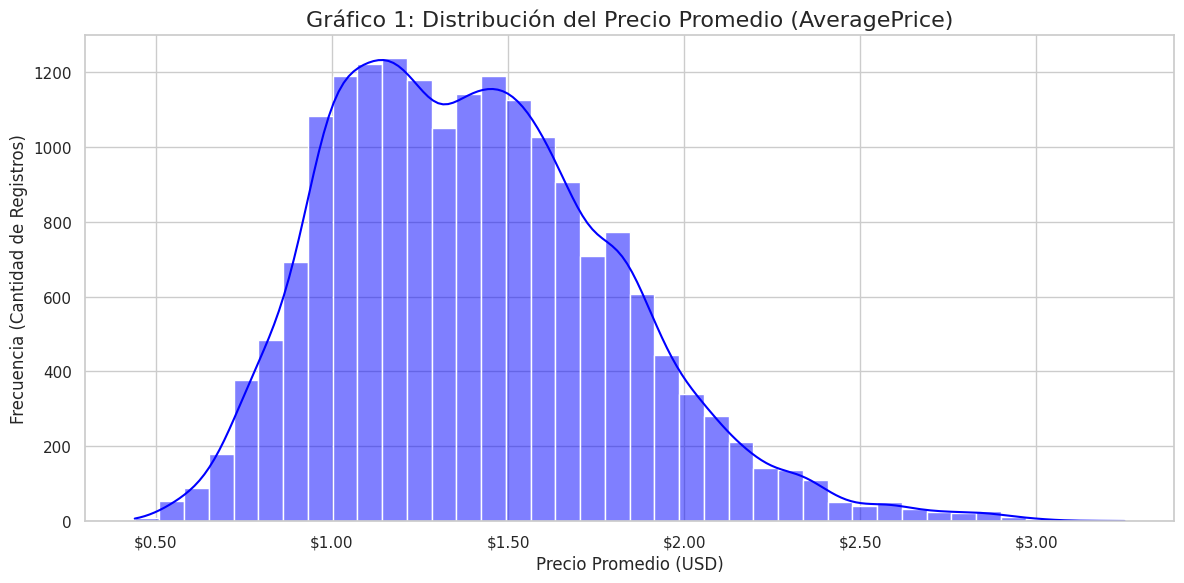

In [3]:
# ---
# Gráfico 1: Distribución del Precio Promedio (AveragePrice)
# ---
plt.figure(figsize=(12, 6))

sns.histplot(df['AveragePrice'], kde=True, bins=40, color='blue')

# --- Mejoras de Legibilidad ---
plt.title('Gráfico 1: Distribución del Precio Promedio (AveragePrice)', fontsize=16)
plt.xlabel('Precio Promedio (USD)', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Registros)', fontsize=12)

# Aplicamos el formato de moneda al eje X
ax = plt.gca() # Get Current Axis
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
    
plt.tight_layout()
plt.show()

#### Análisis del Histograma.
Muestra la frecuencia de los diferentes rangos de precios. El histograma no mostro una distribución normal, en cambio se comporto de manera bimodal, un pico estaba alrededor de $1.00-$1.20 y el otro, más pequeño, estaba alrededor de $1.50-$1.70.

Este comportamiento se debe a que en el dataset tenemos dos tipos de aguacates, convencional y organico.



/tmp/ipykernel_47307/2000544562.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='AveragePrice', data=df, palette='viridis')


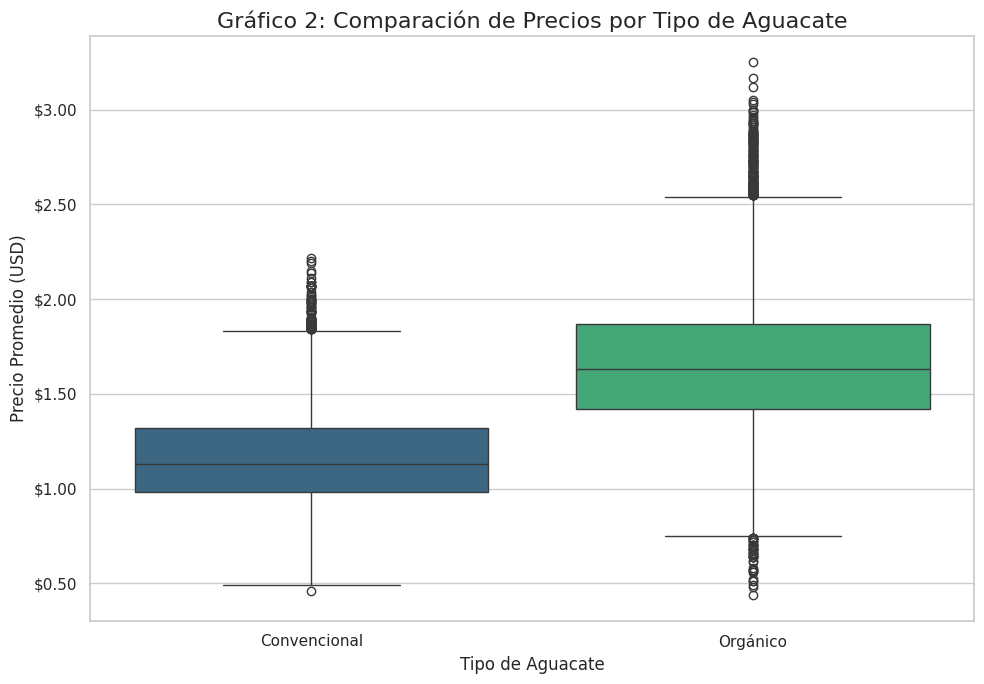

In [4]:
# ---
# Gráfico 2: Comparación de Precios por Tipo de Aguacate
# ---
plt.figure(figsize=(10, 7))

sns.boxplot(x='type', y='AveragePrice', data=df, palette='viridis')

# --- Mejoras de Legibilidad ---
plt.title('Gráfico 2: Comparación de Precios por Tipo de Aguacate', fontsize=16)
plt.xlabel('Tipo de Aguacate', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)

# Renombramos los ticks del eje X para mayor claridad
plt.xticks(ticks=[0, 1], labels=['Convencional', 'Orgánico'])

# Aplicamos el formato de moneda al eje Y
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
    
plt.tight_layout()
plt.show()

#### Analisis del boxplot

Compara la distribución de precios para los dos tipos de aguacates (convencional y organico).

- La caja de 'conventional' estaba centrada mucho más abajo (precios bajos, aprox. $0.90 - $1.25).

- La caja de 'organic' estaba centrada mucho más arriba (precios altos, aprox. $1.30 - $1.80) y era más "alta" (mayor variabilidad).

- Vimos varios puntos (outliers) por encima de la caja de 'organic'.

Un aguacate orgánico es, en promedio, significativamente más caro.

El gráfico también mostró outliers, pero decidimos  que no los eliminaríamos, ya que parecen ser precios orgánicos legítimamente altos, no errores de datos.

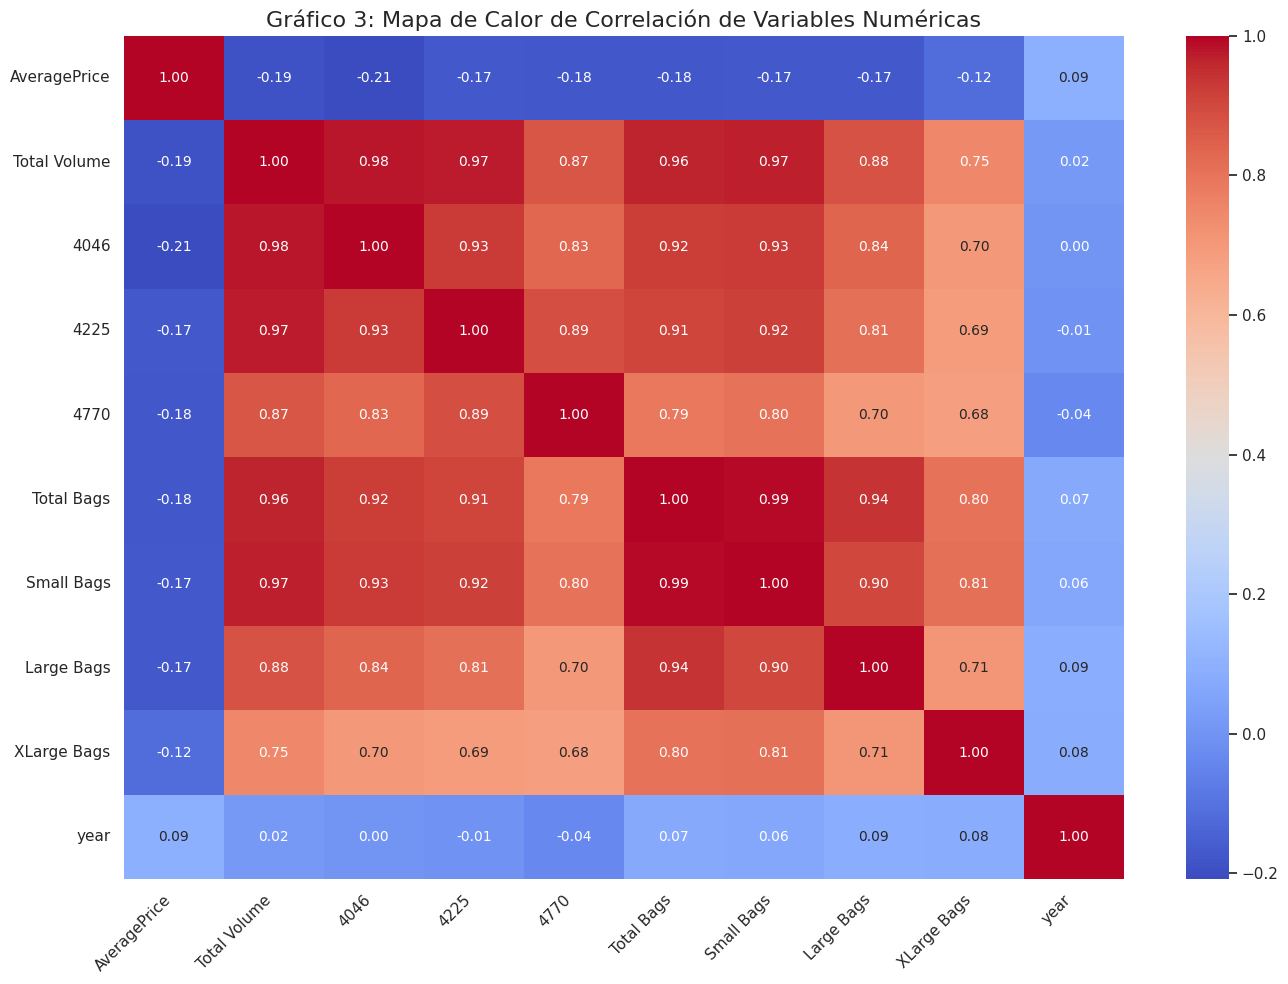

In [5]:
# ---
# Gráfico 3: Mapa de Calor de Correlación de Variables Numéricas
# ---

# Seleccionamos solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
    
plt.figure(figsize=(14, 10))

sns.heatmap(
    correlation_matrix, 
    annot=True,         # Muestra los números de correlación
    cmap='coolwarm',    # Esquema de color (Azul=Negativo, Rojo=Positivo)
    fmt='.2f',          # Formatea los números a 2 decimales
    annot_kws={"size": 10} # Tamaño de la fuente de los números
)
    
# --- Mejoras de Legibilidad ---
plt.title('Gráfico 3: Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### HeatMap

Muestra qué tan relacionadas estan las variables numericas entre si.

- Problema de Correlacion: Vemos un gran "cuadrado" de color rojo brillante (valores de +0.85 a +0.98). Esto nos dice que Total Volume, 4046, 4225, 4770, y Total Bags son casi lo mismo. Son redundantes.

- Oferta y Demanda: AveragePrice tiene una correlación negativa (azul claro, ej. -0.23) con Total Volume. Esto tiene sentido: cuando hay más aguacates (más oferta), el precio baja.

Para la Fase 2, debemos eliminar las columnas redundantes (ej. 4046, 4225, Small Bags, etc.) para evitar el problema de multicolinealidad, que confunde a los modelos de regresión.


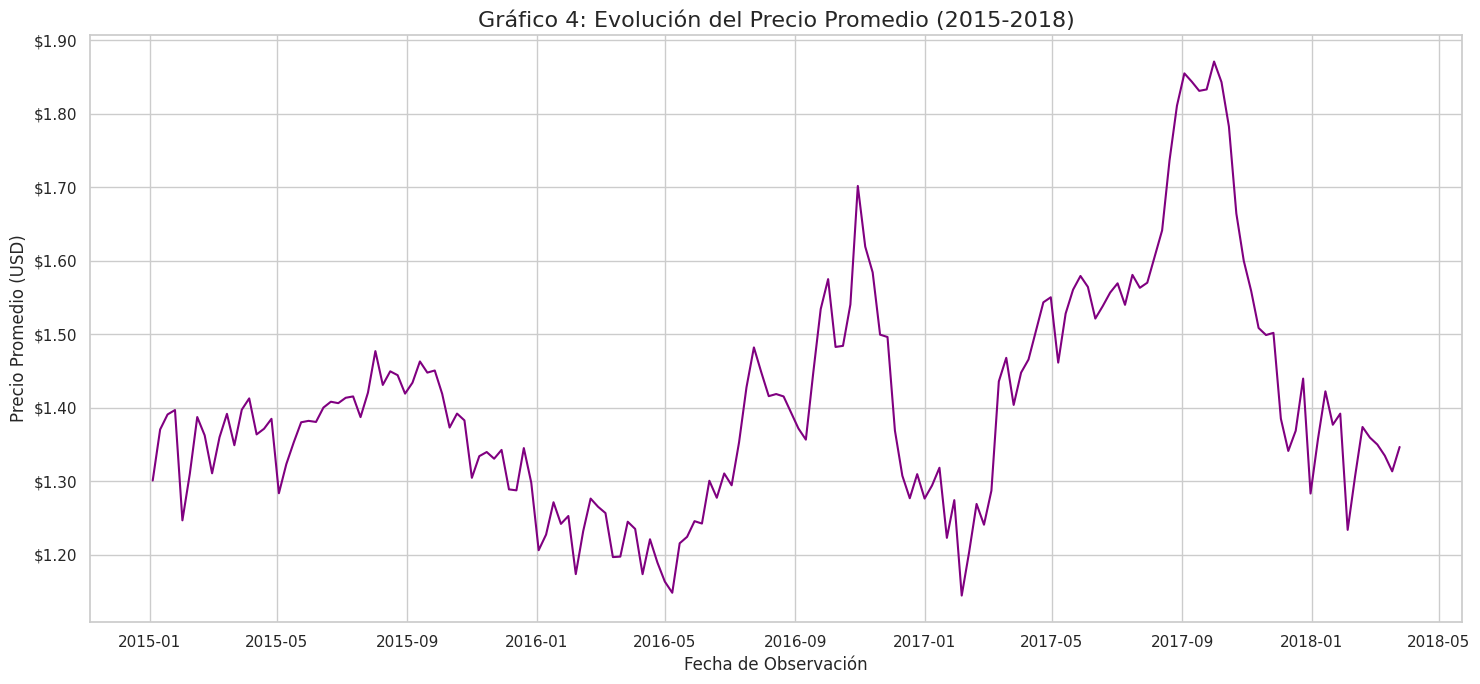

In [6]:
# ---
# Gráfico 4: Evolución del Precio Promedio (2015-2018)
# ---

# Agrupamos por fecha para obtener una sola línea de precio promedio
df_time = df.groupby('Date')['AveragePrice'].mean().reset_index()

plt.figure(figsize=(15, 7))

sns.lineplot(x='Date', y='AveragePrice', data=df_time, color='purple')

# --- Mejoras de Legibilidad ---
plt.title('Gráfico 4: Evolución del Precio Promedio (2015-2018)', fontsize=16)
plt.xlabel('Fecha de Observación', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)

# Aplicamos el formato de moneda al eje Y
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
    
plt.tight_layout()
plt.show()

#### Evolución del Precio en el Tiempo
Muestra el precio promedio a lo largo del tiempo de 2015 a 2018.

El precio no es aleatorio. Muestra dos patrones.


- Estacionalidad: Un ciclo que se repite cada año (sube a finales de verano/otoño, baja en primavera).

- Tendencia: Una ligera tendencia general al alza a lo largo de los años.

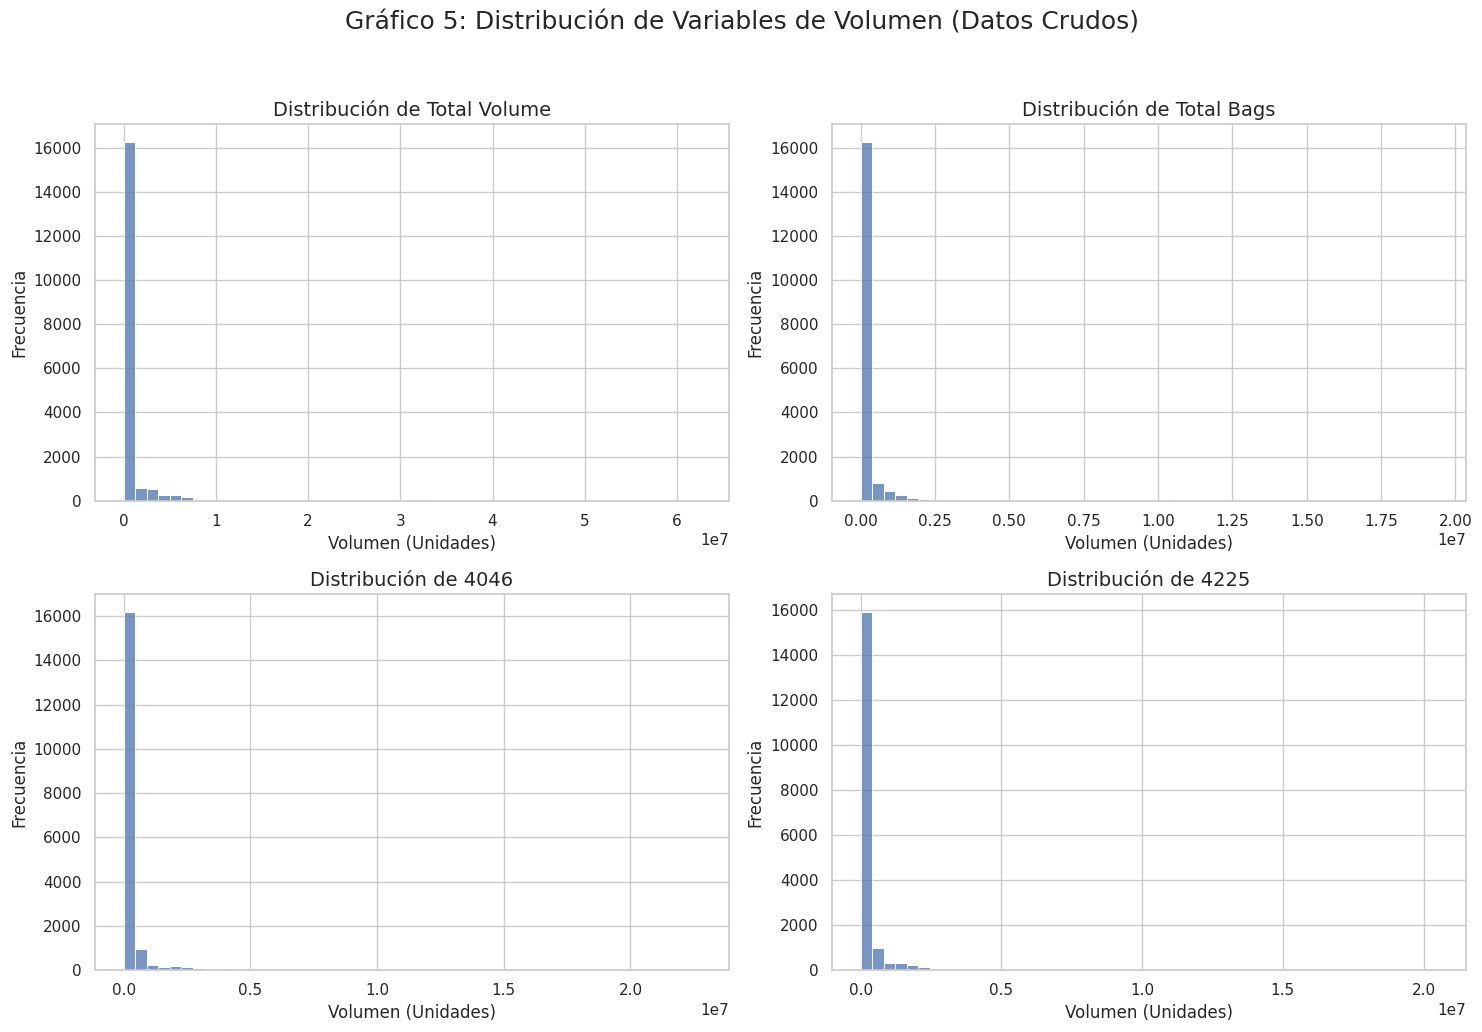

In [7]:
# ---
# Gráfico 5: Distribución de Variables de Volumen (Datos Crudos)
# ---

# Lista de las principales variables de volumen
volume_cols = ['Total Volume', 'Total Bags', '4046', '4225']

plt.figure(figsize=(15, 10))
plt.suptitle('Gráfico 5: Distribución de Variables de Volumen (Datos Crudos)', fontsize=18, y=1.03)
    
for i, col in enumerate(volume_cols):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=50, kde=False, ax=ax)
    ax.set_title(f'Distribución de {col}', fontsize=14)
    ax.set_xlabel('Volumen (Unidades)')
    ax.set_ylabel('Frecuencia')
    # Formato científico para ejes con números muy grandes
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

#### Distribución de Volumen (Datos Crudos)

Histogramas de las columnas de volumen (Total Volume). Vemos la frecuencia de las ventas.

Todos los gráficos están "aplastados" contra la izquierda.

Esto indica que la mayoría de las ventas son de volumen bajo/medio, pero existen unos pocos valores atípico de ventas masivas que distorsionan toda la escala.

Los modelos de regresión lineal funcionan muy mal con datos tan sesgados, por lo tanto debemos transformar estos datos.

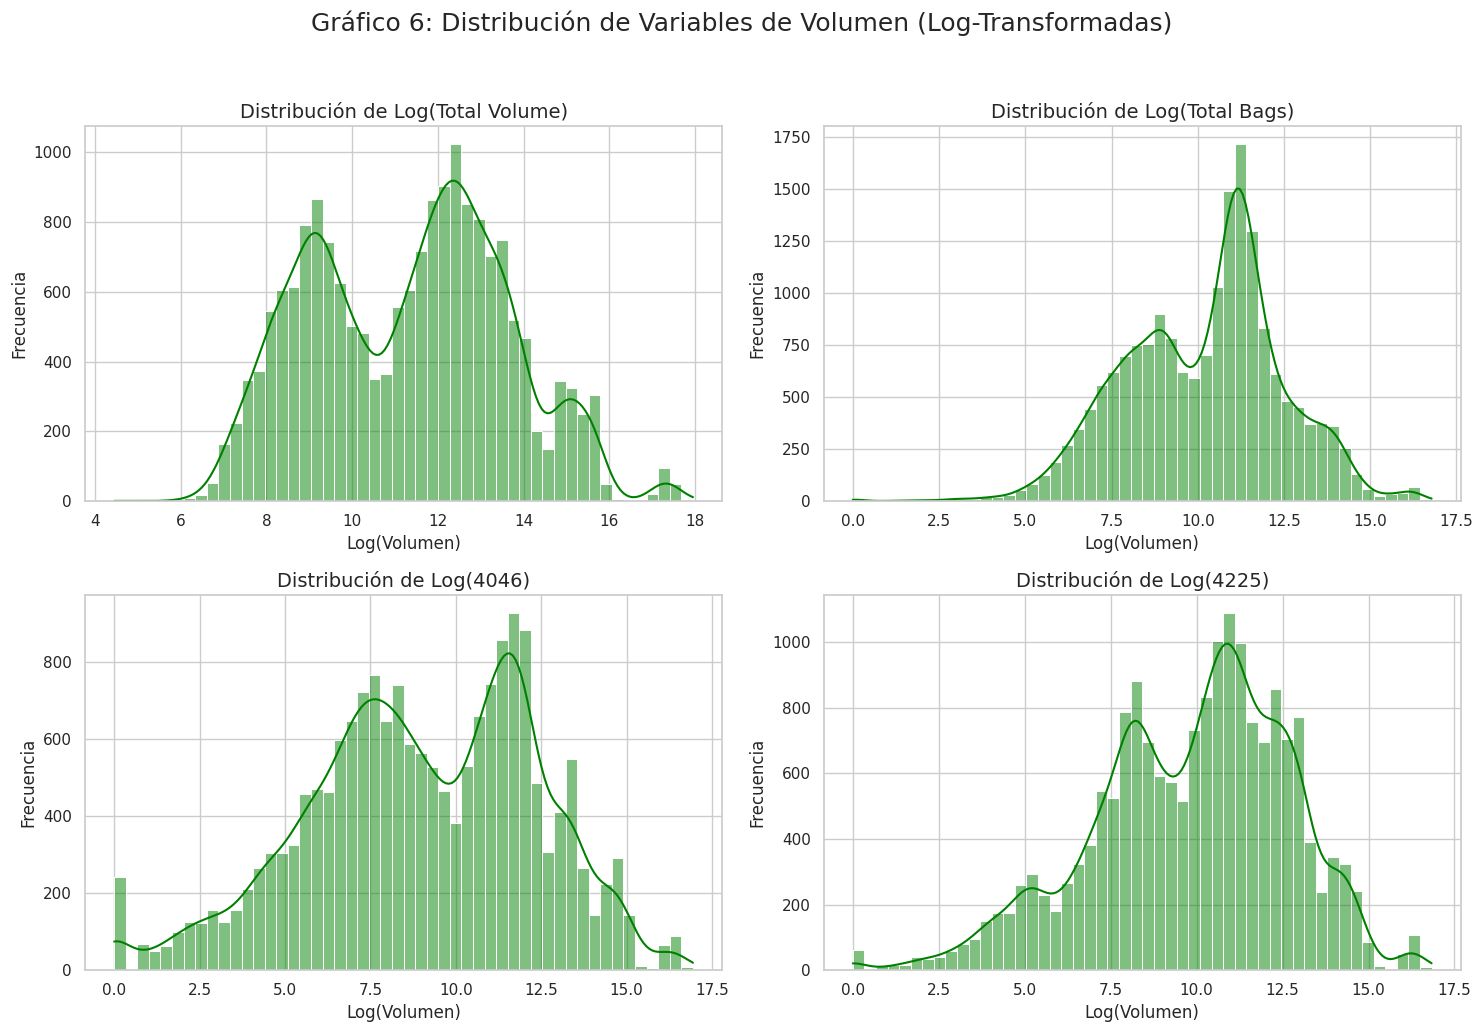

In [8]:
# ---
# Gráfico 6: Distribución de Variables de Volumen (Log-Transformadas)
# ---

# Lista de las principales variables de volumen (misma que el gráfico 5)
volume_cols = ['Total Volume', 'Total Bags', '4046', '4225']

plt.figure(figsize=(15, 10))
plt.suptitle('Gráfico 6: Distribución de Variables de Volumen (Log-Transformadas)', fontsize=18, y=1.03)
    
for i, col in enumerate(volume_cols):
    ax = plt.subplot(2, 2, i + 1)
    # Aplicamos np.log1p (log(1+x)) para transformar los datos
    log_data = np.log1p(df[col])
    sns.histplot(log_data, bins=50, kde=True, ax=ax, color='green')
    ax.set_title(f'Distribución de Log({col})', fontsize=14)
    ax.set_xlabel('Log(Volumen)')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Distribución de Volumen (Log-Transformadas)
Los mismos histogramas del Gráfico anterior, pero después de aplicarles una transformación logarítmica

Al aplicar el logaritmo, la escala se "comprime". Las distribuciones que antes estaban aplastadas ahora se asemejan mucho más a una distribución normal. Los outliers ya no dominan el gráfico.

Esto nos ayuda a entender que en la fase 2 no debemos eliminar estos valores atipicos que son ventas reales, sino que debemos aplicarles una transformación logaritmica.


---------------------------------------------------------------------------------------------------------------------

# Conversión de la columna Date → variables numéricas

**Date convertido a datetime.**

Se derivaron 4 columnas nuevas y se eliminó la original Date:

- **year_date** → año (ej. 2015)
- **month** → mes (1–12)
- **day** → día del mes (1–31)
- **week** → número de la semana ISO (1–52/53)

**Efecto:** incorporar información temporal en forma numérica, utilizable por modelos.

**Por qué:** las fechas no pueden escalarse directamente; extraer componentes captura estacionalidad y tendencias.

In [9]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Crear variables derivadas
    df['year_date'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['week'] = df['Date'].dt.isocalendar().week.astype(int)

    # Eliminar la columna original
    df = df.drop(columns=['Date'])

print("Fecha convertida en variables numéricas (año, mes, día, semana).")

Fecha convertida en variables numéricas (año, mes, día, semana).


# Revisión e imputación de valores nulos

**Se inspeccionó `df.isna().sum()` y no había nulos.

**Aun así, ese aplicamos una regla general para imputar si hubieran existido:**

- **Numéricos** → imputación por mediana
- **Categóricos** → imputación por moda (valor más frecuente)

**Efecto:** evita errores en modelos que no aceptan NaN y preserva la robustez

In [10]:
print("Valores nulos por columna:")
print(df.isna().sum())


#Imputación de valores nulos
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Valores nulos imputados.")

Valores nulos por columna:
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
year_date       0
month           0
day             0
week            0
dtype: int64
Valores nulos imputados.


# Detección y tratamiento de outliers

**Para cada variable numérica se calculó:**
- `IQR = Q3 - Q1`
- `lower = Q1 - 1.5*IQR`
- `upper = Q3 + 1.5*IQR`

**Los valores fuera de esos límites no se eliminaron, se capearon (winsorize) hacia los límites:**
- `valores < lower` → reemplazados por `lower`
- `valores > upper` → reemplazados por `upper`

**Efecto:** reduce la influencia de valores extremos en modelos sensibles sin perder filas.

**Por qué:** mantener la fila preserva información, pero evita que un outlier distorsione la escala o los coeficientes.

In [11]:
#Detección y tratamiento de outliers (solo numéricos)
# ------------------------------------------------------------
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

print("Outliers tratados (winsorización aplicada).")

Outliers tratados (winsorización aplicada).


# Codificación de variables categóricas → dummies

**`pd.get_dummies(df, drop_first=True)` se aplicó a columnas no numéricas (por ej. type, region).**

**Resultado:** columnas binarias (0/1) por cada categoría.

**Efecto:** todas las variables ahora son numéricas, de esta forma los modelos pueden consumirlas directamente.

**Observación:** `drop_first=True` ayuda a regresión lineal a evitar multicolinealidad perfecta.

In [12]:
#Convertir variables categóricas a dummies
# ------------------------------------------------------------
df = pd.get_dummies(df, drop_first=True)

print("Variables categóricas convertidas. Total columnas: {df.shape[1]}")

Variables categóricas convertidas. Total columnas: {df.shape[1]}


## Estandarización de las Variables Predictoras

Con el fin de garantizar que todas las variables numéricas utilizadas por los modelos de regresión estén en una misma escala, se realizó un proceso de **estandarización** empleando la técnica **StandardScaler** de la biblioteca `scikit-learn`.  

### Objetivo

La estandarización busca **homogeneizar las magnitudes** de las variables independientes, evitando que aquellas con valores numéricos más grandes dominen el entrenamiento del modelo. Esto es especialmente importante para modelos sensibles a la escala de los datos, como la **Regresión Lineal** y las **Redes Neuronales**.

### Procedimiento

1. Se identificó la variable objetivo (`AveragePrice`), que **no debe ser escalada**, ya que representa el valor real del aguacate que se desea predecir.
2. Se separaron las variables predictoras (features) de la variable objetivo.
3. Se aplicó el método **StandardScaler**

In [13]:
# Convertir todos los valores booleanos a 0 y 1
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Separar la variable objetivo
y = df['AveragePrice']
X = df.drop(columns=['AveragePrice'])

# Identificar columnas que corresponden a regiones (dummies)
region_cols = [col for col in X.columns if col.lower().startswith('region_')]

# Identificar columnas numéricas que SÍ deben escalarse (excepto regiones)
numeric_cols = [col for col in X.select_dtypes(include=['float64', 'int64']).columns 
                if col not in region_cols]

y = df['AveragePrice']
X = df.drop(columns=['AveragePrice'])

# Dividir en entrenamiento y prueba antes de escalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Identificar columnas numéricas a escalar
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Ajustar el escalador solo con los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

# Aplicar la transformación a ambos conjuntos
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Variables numéricas estandarizadas correctamente.")
print("🔒 Escalador entrenado solo con X_train (sin fuga de datos).")

# 6️⃣ Combinar con la variable objetivo
train_clean = pd.concat([y_train, X_train_scaled], axis=1)
test_clean = pd.concat([y_test, X_test_scaled], axis=1)

/tmp/ipykernel_47307/2918426214.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


✅ Variables numéricas estandarizadas correctamente.
🔒 Escalador entrenado solo con X_train (sin fuga de datos).


# Exportación

**Se guardó `avocado_final_clean.csv`.**

In [14]:
#Exportar dataset limpio y estandarizado
# ------------------------------------------------------------
train_clean.to_csv("avocado_train_clean.csv", index=False)
test_clean.to_csv("avocado_test_clean.csv", index=False)

print("\n💾 Archivos exportados correctamente:")
print(" - avocado_train_clean.csv  → entrenamiento")
print(" - avocado_test_clean.csv   → prueba")


💾 Archivos exportados correctamente:
 - avocado_train_clean.csv  → entrenamiento
 - avocado_test_clean.csv   → prueba
